In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_IN = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [5]:
job_titles = df['job_title_short'].value_counts().index[:6].tolist()

df_IN_top6 = df_IN[df_IN['job_title_short'].isin(job_titles)]

df_IN_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
7195,Software Engineer,BI Developer,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-02-13 13:28:38,False,False,India,year,79200.0,NaN,Pattern,"[sql, oracle, snowflake, tableau]","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781857,Senior Data Engineer,Senior Data Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-03-26 06:17:50,False,False,India,year,147500.0,NaN,Publicis Groupe,"[sas, sas, sql, python, oracle]","{'analyst_tools': ['sas'], 'cloud': ['oracle']..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [6]:
job_order = df_IN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index
job_order

Index(['Data Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Analyst', 'Software Engineer', 'Business Analyst'],
      dtype='object', name='job_title_short')

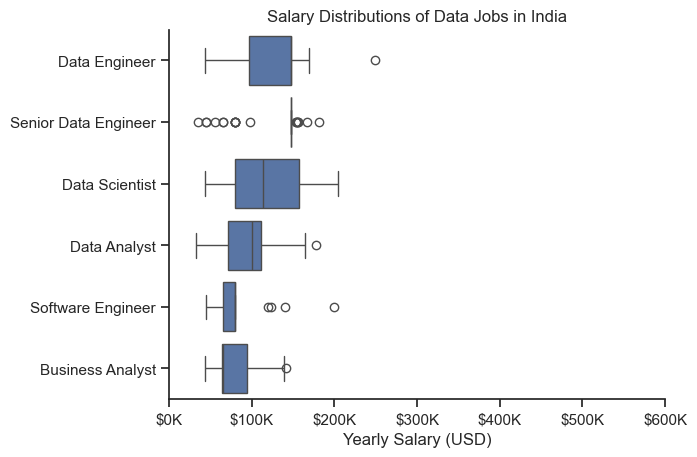

In [12]:
sns.boxplot(df_IN_top6, x = 'salary_year_avg', y = 'job_title_short', order = job_order)
sns.set_theme(style = 'ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [8]:
# Only get data analyst jobs in the US
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])

df_DA_IN = df_DA_IN.explode('job_skills')

df_DA_IN[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [9]:
df_DA_top_pay = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [10]:
df_DA_skills = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_DA_skills = df_DA_skills.head(10).sort_values(by = 'median', ascending = False)
df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


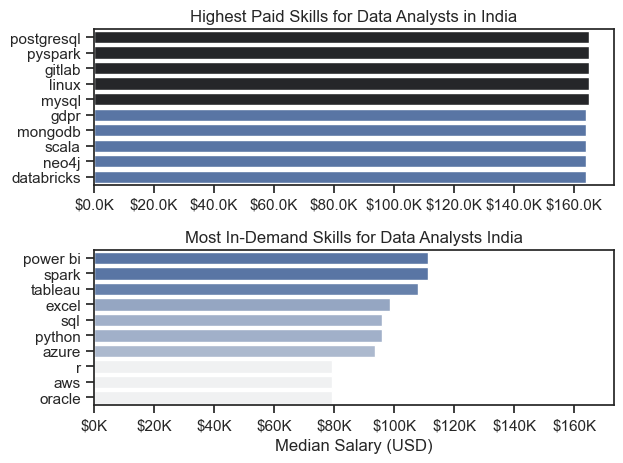

In [11]:
fig, ax = plt.subplots(2,1)

sns.barplot(df_DA_top_pay, x = 'median', y = 'job_skills', hue = 'median', ax = ax[0], palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()